In [14]:
import wave

# open file dialtones.wav
dialtones = wave.open('dialtones.wav', 'r')

# get the number of frames, channels, and framerate
nframes = dialtones.getnframes()
nchannels = dialtones.getnchannels()
framerate = dialtones.getframerate()

print('nframes: ', nframes)
print('nchannels: ', nchannels)
print('framerate: ', framerate)

nframes:  48000
nchannels:  1
framerate:  8000


signal:  [ 23548  26558  10901 ... -27939 -25184      0]


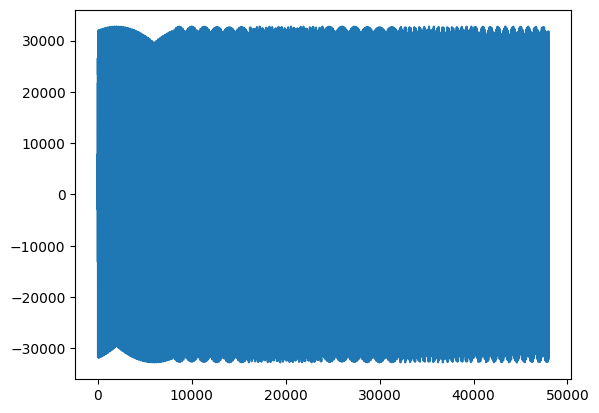

In [15]:
import matplotlib.pyplot as plt
import numpy as np

signal = dialtones.readframes(nframes)
signal = np.frombuffer(signal, dtype=np.int16)

print('signal: ', signal)
plt.plot(signal)

clip 1:  [697, 1477]
clip 2:  [697, 1209]
clip 3:  [770, 1209]
clip 4:  [697, 1209]
clip 5:  [770, 1336]
clip 6:  [852, 1477]


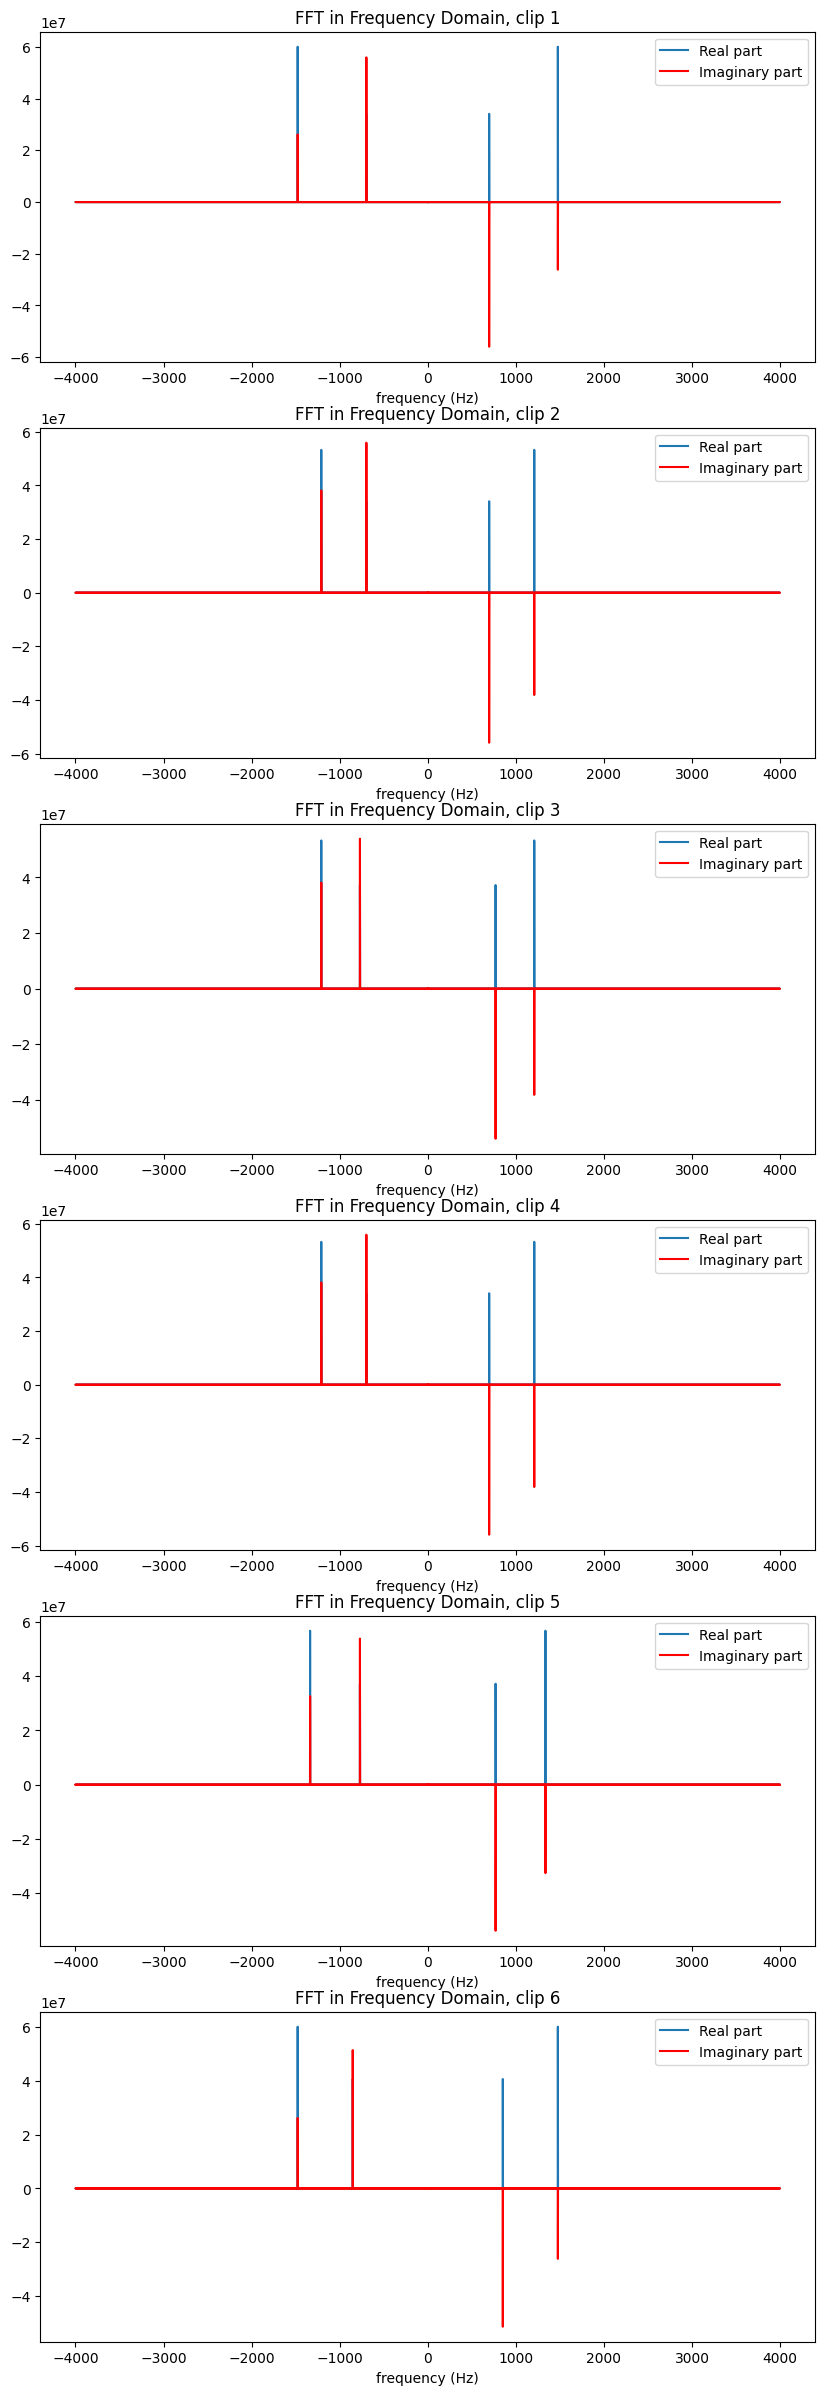

In [26]:
# split the signal into 6 clips, each clip lasts 1 second
fig, ax = plt.subplots(6, 1, figsize=(10, 30))

for i in range(6):

    # get the ith clip of 1 second
    clip = signal[i*framerate:(i+1)*framerate]

    # run FFT on the clip, obtain frequency and amplitude
    fft_wave = np.fft.fft(clip)
    fft_fre = np.fft.fftfreq(nframes // 6, 1/framerate)

    # plot the clip in frequency domain
    ax[i].plot(fft_fre, fft_wave.real, label="Real part")
    ax[i].plot(fft_fre, fft_wave.imag,label="Imaginary part", color="red")
    ax[i].legend(loc=1)
    ax[i].set_title(f"FFT in Frequency Domain, clip {i+1}")
    ax[i].set_xlabel("frequency (Hz)")

    # get the 4 frequencies with the highest amplitudes
    amplitudes = np.abs(fft_wave)
    highest_freq = set()

    for j in range(4):
        max_index = np.argmax(amplitudes)
        highest_freq.add(abs(round(fft_fre[max_index])))
        amplitudes[max_index] = 0

    print(f'clip {i+1}: ', sorted(highest_freq))
plt.show()

|        | 1209 Hz | 1336 Hz | 1477 Hz |
|--------| --- | --- | --- |
| 697 Hz | 1 | 2 | 3 |
| 770 Hz | 4 | 5 | 6 |
| 852 Hz | 7 | 8 | 9 |
| 941 Hz | * | 0 | # |

clip 1:  697, 1477
clip 2:  697, 1209
clip 3:  770, 1209
clip 4:  697, 1209
clip 5:  770, 1336
clip 6:  852, 1477

Answer: 3 1 4 1 5 9